# Image Filtering: Spatial Methods

In [17]:
%matplotlib inline

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage.util import img_as_float32 as img_as_float

from scipy.ndimage import convolve

In [18]:
def print_imginfo(I):
    print(type(I))
    print(I.shape, I.dtype)
    print('Data range:', np.min(I), 'to', np.max(I))

In [19]:
def show_imghist(I):
    fig, ax = plt.subplots(1, 2, figsize=(10,3))
    
    ax[0].imshow(I, cmap='gray', vmin=0.0, vmax=1.0)
    ax[0].set_axis_off()
    
    ax[1].hist(I.ravel(), lw=0, bins=256, range=(0.01,0.99));
    ax[1].set_xlim(0.0,1)
    ax[1].set_yticks([])

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.1296796 to 0.99212784


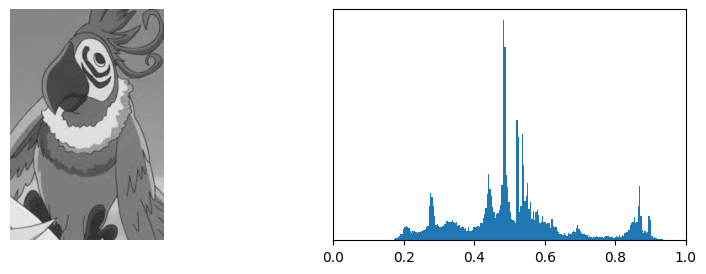

In [20]:
I1 = io.imread("./parrot.jpeg", as_gray=True)
# I1 = io.imread("../../images/cars.jpg", as_gray=True)
I1 = img_as_float(I1)

print_imginfo(I1)
show_imghist(I1)

## Linear Filter:  Blurring Kernels

In [21]:
def box_kernel(N, M=None):
    if M == None:
        M = N
    
    h = np.ones((N,M))
    h /= h.sum()
    
    return h

def gaussian_kernel(sigma=1.0, truncate=3.0):
    N = np.int32(np.round(truncate*sigma))
    
    x = np.arange(-N, N+1)
    y = np.arange(-N, N+1)
    xv, yv = np.meshgrid(x, y)
    
    h = np.exp(-0.5*(xv**2+yv**2)/(sigma**2))
    h /= h.sum()

    return h

## Linear Filter: Image Smoothing

Gaussian kernel:
[[0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.02 0.01 0.   0.  ]
 [0.   0.01 0.06 0.1  0.06 0.01 0.  ]
 [0.   0.02 0.1  0.16 0.1  0.02 0.  ]
 [0.   0.01 0.06 0.1  0.06 0.01 0.  ]
 [0.   0.   0.01 0.02 0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.  ]]

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.19488491 to 0.89950085

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.18014325 to 0.9128032


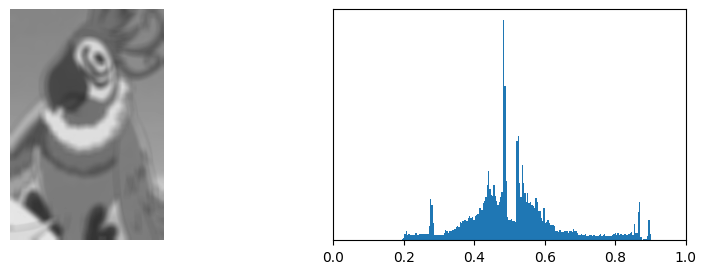

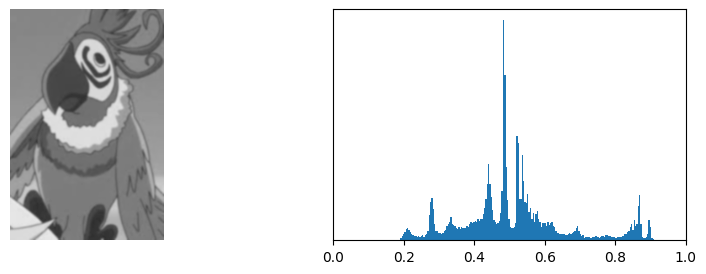

In [22]:
# mode: reflect  (d c b a | a b c d | d c b a)
# mode: constant (k k k k | a b c d | k k k k) -- (cval=k)
# mode: nearest  (a a a a | a b c d | d d d d)
# mode: mirror     (d c b | a b c d | c b a)
# mode: wrap     (a b c d | a b c d | a b c d)

mode = 'reflect'
sigma = 1.0

h1 = box_kernel(9)
I2 = convolve(I1, h1, mode=mode)

h2 = gaussian_kernel(sigma=sigma, truncate=3)
I3 = convolve(I1, h2, mode=mode)

print('Gaussian kernel:')
print(np.around(h2,2))
print('')

print_imginfo(I2)
print('')
print_imginfo(I3)

show_imghist(I2)
show_imghist(I3)

## Linear Filter: Separable Kernel

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.18014325 to 0.9128032


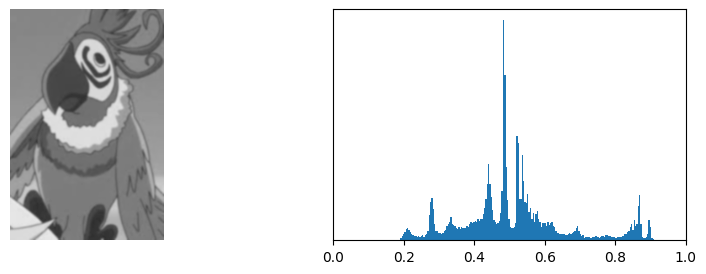

In [23]:
from scipy import signal

N = 2*np.int32(np.round(3*sigma))+1
h = signal.windows.gaussian(N, sigma)
h /= np.sum(h)

I4 = convolve(I1, h.reshape((1,N)), mode=mode)
I4 = convolve(I4, h.reshape((N,1)), mode=mode)
I4 = img_as_float(I4)

print_imginfo(I4)
show_imghist(I4)

## Linear Filter: Unsharp Masking

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.1296796 to 0.99212784

<class 'numpy.ndarray'>
(275, 183) float32
Data range: 0.0 to 1.0


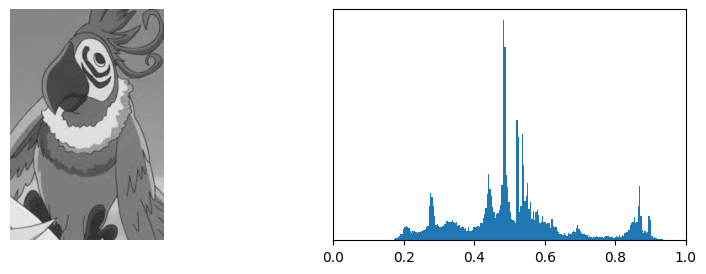

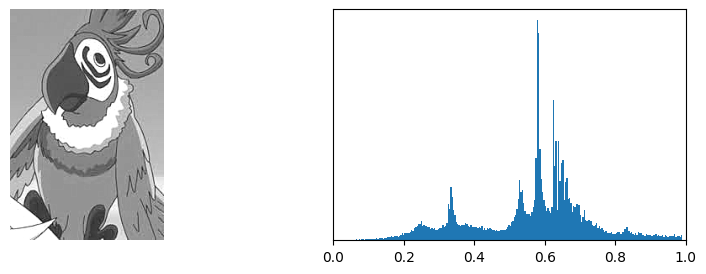

In [24]:
alpha = 1.2
I5 = alpha*I1 + alpha*(I1-I4)
I5 = np.clip(I5, 0, 1)

print_imginfo(I1)
print('')
print_imginfo(I5)

show_imghist(I1)
show_imghist(I5)